# Data Smoothing 

<img src="https://pbs.twimg.com/media/GAplz0QbsAES7jD?format=jpg&name=large" width='200' />

Data smoothing is a technique used to remove noise from time series data, making it easier to analyze and interpret. There are several methods of data smoothing, such as moving averages, exponential smoothing, resampling, and spline interpolation. However, it’s important to note that not all time series data requires smoothing. The need for smoothing depends on the analysis or model that you intend to use. In some cases, heavily preprocessed data, like the present example, may not require additional smoothing. It’s always essential to assess your data and consider the specific context to determine if smoothing is necessary.

TIPs:
* Yet if our trajectory data has the potential to be interpreted visually, it can lack smoothness basically for one of two reasons: Either it’s noisy (as in a flock of birds) or it’s sampled too sparsely. To achieve the desired smoothness in visualization, the answer is simple: If the data is noisy, don’t stress; apply LOWESS. If the data is too sparsely sampled, don’t whine; apply B-spline. If the data is both noisy and too sparsely sampled, then smoothing won’t do anything to make it more interpretable

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def graph(x_array, y_array, custom_title, scatter=True, solid_line=False, line_viz = None):
    ''' This function can accept basic x and y arrays for a basic 
    scatter plot or line plot (or both), but it can also accept, 
    in its line_viz parameter, a list of x, y array pairs.
    Its configuration for coloring, line weight, and dot size are 
    tailored specifically for the smoothing examples presented in 
    this blog.'''
    
    # Set up the plotting
    figure_proportions = (10, 5)
    plt.figure(figsize=figure_proportions )    
    x_min, x_max = -3.3, 4.3
    y_max = 100
    y_axis_label = 'altitude (feet)'
    x_axis_label = 'time (seconds from arrival at target)'
    title = 'Trajectory of flight'
    custom_title = title + ' - ' + custom_title
    plt.title(custom_title)         
    dot_opacity = line_opacity = 1
    size = 30 if len(x_array) > 15 else 100 
    line_weight=1
    
    # Handle the cases where lines or curves are visualized, 
    # beyond the obvious
    if line_viz != None:
        if len(line_viz) == 1:
            colors = ['green']
        if len(line_viz) ==2:
            colors = ['lightseagreen', 'olive']
            dot_opacity = .3
            line_weight = 3
        if len(line_viz) == 4:
            dot_opacity = .1
            line_opacity = .1
            colors = ['turquoise', 'magenta','tomato', 'gold']           
        for i, (x, y) in enumerate(line_viz):
            plt.plot(x, y, color = colors[i], lw=3)
    
    # Handle the standard cases
    if scatter:
        plt.scatter(x_array, y_array, color = 'green', marker = "o", alpha = dot_opacity, s=size) 
    if solid_line:
        plt.plot(x_array, y_array, color = 'green', alpha = line_opacity)
    # Present the plotting
    plt.xlabel(x_axis_label) 
    plt.ylabel(y_axis_label) 
    plt.xlim(x_min, x_max )
    plt.ylim(0, y_max )
    # plt.savefig('viz/'+custom_title+'.svg')
    plt.show()

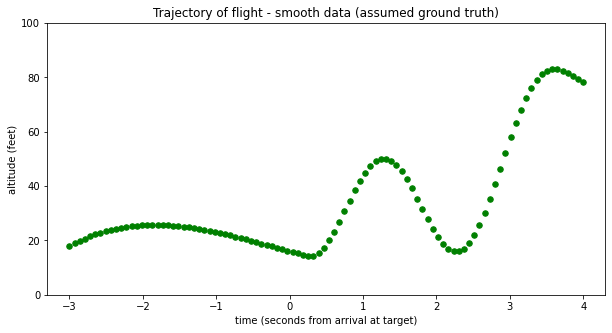

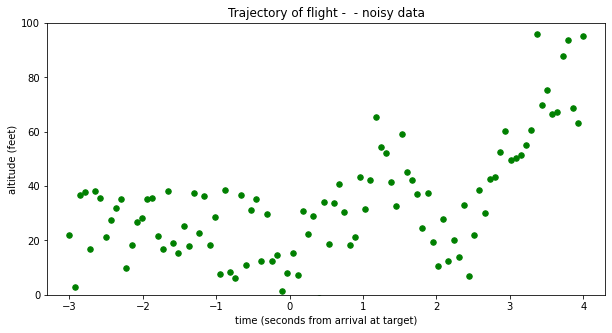

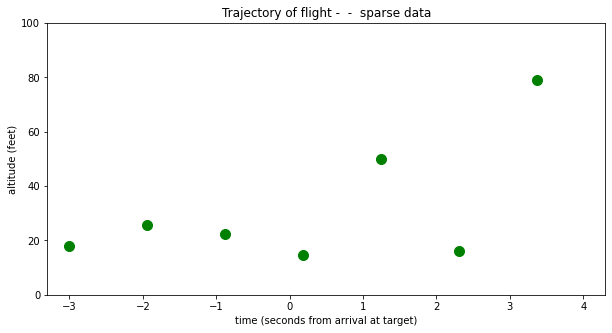

In [10]:
import numpy as np 
import matplotlib.pyplot as plt

title = 'Trajectory of flight'
x_min, x_max = -3.3, 4.3

in_array = np.linspace(-3, 4, 100) 
def curve1(in_array_ ):
    return (in_array_**3) + ((in_array_*.9-4)**2)
def curve2(in_array_ ):
    return (20*np.sin((in_array_)*3+4)+20) + curve1(in_array_ )
    
x = in_array
curve = np.piecewise(x, [x<.2, x >=.2], [lambda x: curve1(x), lambda x: curve2(x)])

flux_range = 35
random_flux = np.random.rand(len(curve))*flux_range - flux_range/2
noisy_data =  curve + random_flux

sampling_increment = 15
sparse_input = in_array[::sampling_increment]
sparse_data =     curve[::sampling_increment]

title_suffix = 'smooth data (assumed ground truth)'
graph(in_array, curve, title_suffix , scatter=True, solid_line=False)

title_suffix = ' - noisy data'
graph(in_array, noisy_data, title_suffix, scatter=True, solid_line=False)

title_suffix = ' -  sparse data'
graph(sparse_input, sparse_data, title_suffix, scatter=True, solid_line=False, line_viz = None)


# LOWESS

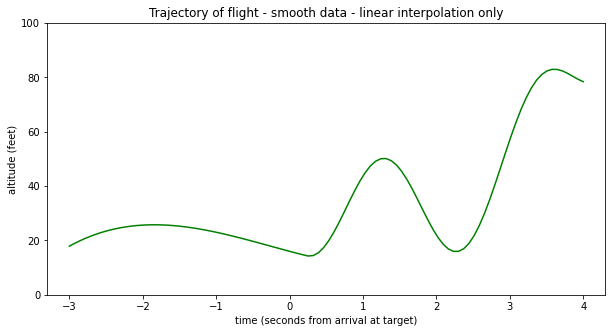

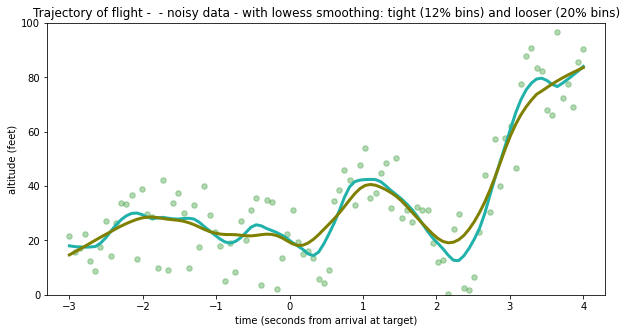

In [9]:
# ground truth linear interpolation
title_suffix = 'smooth data' + ' - linear interpolation only'
graph(in_array, curve, title_suffix, scatter=False, solid_line=True)

# two LOWESS curves
custom_title = title + '  –  noisy data' + ' with lowess smoothing: tight (12% bins) and looser (20% bins)'

from statsmodels.nonparametric.smoothers_lowess import lowess

lowess_tight = lowess(noisy_data, in_array, frac = .12)
lowess_loose = lowess(noisy_data, in_array, frac = .2)
lowess_list = [(lowess_tight[:,0], lowess_tight[:,1]), (lowess_loose[:,0], lowess_loose[:,1]) ]
graph(in_array, noisy_data,  ' - noisy data'+ ' - with lowess smoothing: tight (12% bins) and looser (20% bins)', scatter=True, solid_line=False, line_viz = lowess_list)

## B-Splines

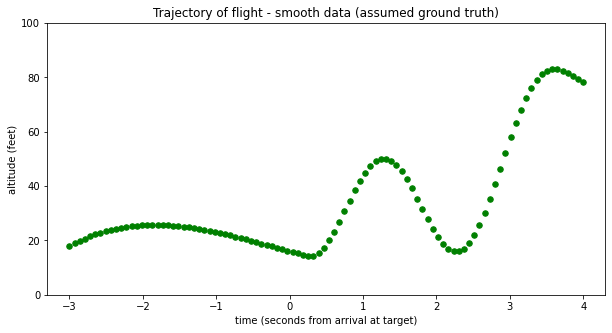

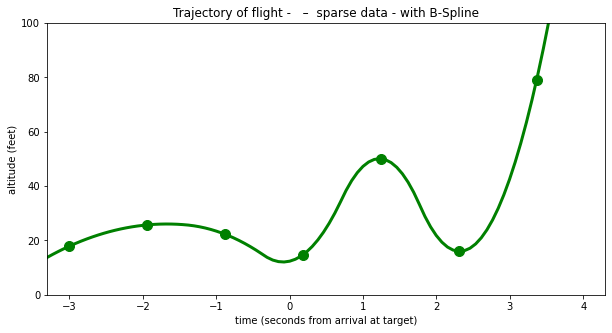

In [11]:
title_suffix = 'smooth data (assumed ground truth)'
graph(in_array, curve, title_suffix , scatter=True, solid_line=False)

title_suffix = '  –  sparse data' +   ' - with B-Spline'
import scipy

x_interp = np.linspace(x_min, x_max, 100)
BSpline = scipy.interpolate.make_interp_spline(sparse_input, sparse_data, 2)
y_BSpline = BSpline(x_interp)

spline_duple = [(x_interp, y_BSpline)  ]
graph(sparse_input, sparse_data, title_suffix, scatter=True, solid_line=False, line_viz = spline_duple)


## References

* https://towardsdatascience.com/data-smoothing-for-data-science-visualization-the-goldilocks-trio-part-1-867765050615